In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip install farasapy

In [3]:
import os
import pandas as pd
import string
import numpy as np
import re
from nltk.corpus import stopwords
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [77]:
folder_path = 'your directory'

data = []


for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as f:
      for line in f:
        data.append({'filename': filename, 'sentence': line.strip()})

df = pd.DataFrame(data)
df['Grade'] = df['filename'].str[:3]
print(df)

                filename                                           sentence  \
0      G01_Sentences.txt  وهو كتاب بني على الطريقة الجامعة بين الطريقتين...   
1      G01_Sentences.txt  ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...   
2      G01_Sentences.txt  يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...   
3      G01_Sentences.txt           وتحتوي على أنشطة وتدريبات ملائمة لحواس .   
4      G01_Sentences.txt                           وفي طريقة تعلم الكتابة :   
...                  ...                                                ...   
13050  G06_Sentences.txt                ١١ اتصف بها البدء في الرمن الماضي .   
13051  G06_Sentences.txt  ب - بم فسر المتحدت محافظة البدو على عادة إكرام...   
13052  G06_Sentences.txt                     التباهي والتفاخر بين القبائل .   
13053  G06_Sentences.txt                    الحصول على العامة بين القبائل .   
13054  G06_Sentences.txt                ٠١ مواجهة صعودات العيش في البادية .   

      Grade  
0       G01  
1       G01  
2       G

## Data Analysis

In [78]:
grade_counts = df.groupby('Grade').size()
grade_counts

Grade
G01      62
G02     145
G03     414
G04     680
G05     775
G06     750
G07    1399
G08    1486
G09    1431
G10    1413
G11    1746
G12    2754
dtype: int64

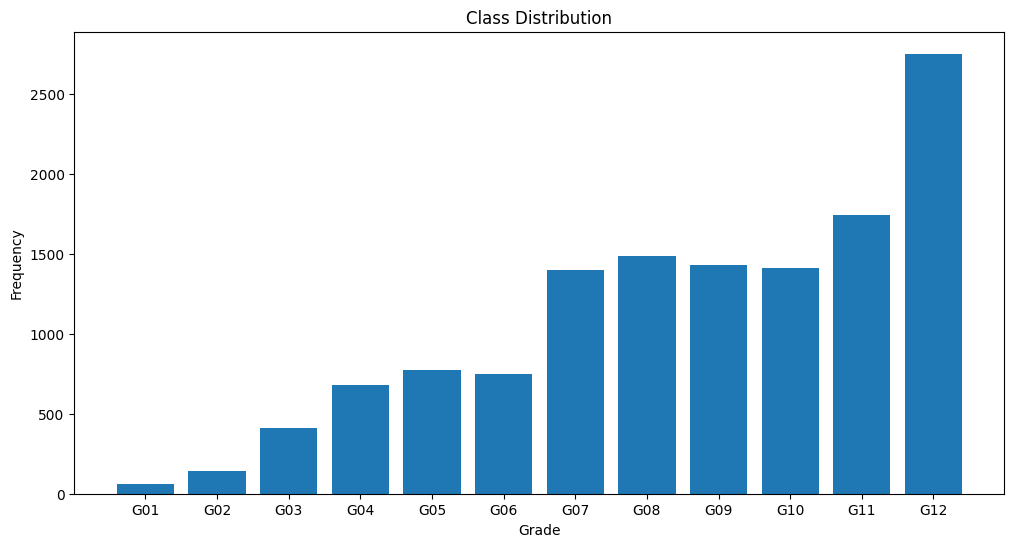

In [70]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

## Data Resampling

In [7]:
X = df.drop(columns=['Grade'])
y = df['Grade']

In [8]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [9]:
df = pd.DataFrame(X_resampled)
df['Grade'] = y_resampled

In [10]:
df

,filename,sentence,Grade
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01
...,...,...,...
739,G12_Sentences.txt,واستكشاف الحقائق الجوهرية التي تعمل على إثراء ...,G12
740,G12_Sentences.txt,ثم استكشفه من خلال ما يأتي :,G12
741,G12_Sentences.txt,وعلى التزام أدبي صادق ومعبر من الشاعر نحو قضاي...,G12
742,G12_Sentences.txt,الخيوط الممتدة السماء مرآة مقعرة جلاها الصقيع :,G12


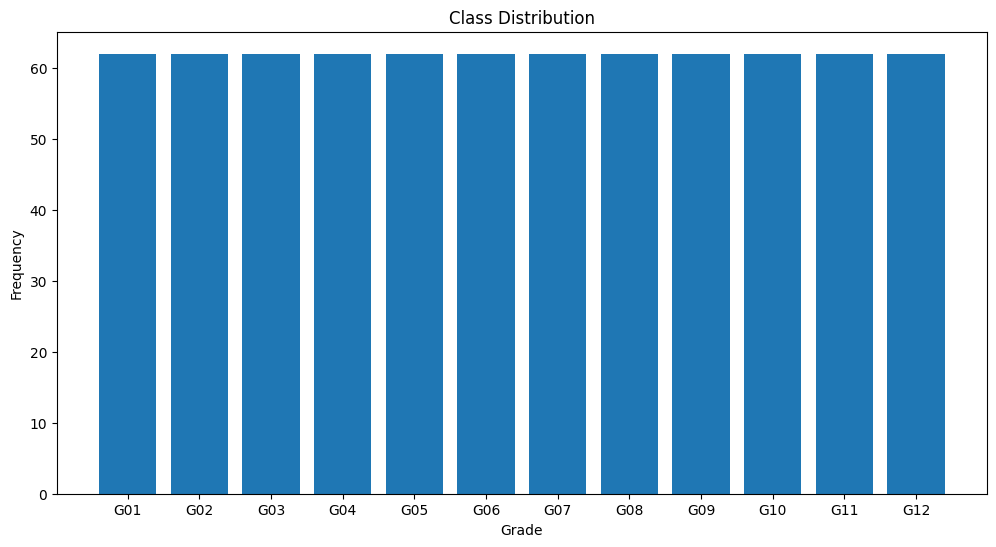

In [64]:
grade_counts = df.groupby('Grade').size()
grade_counts
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

### Resample G11 & G12

In [81]:
import pandas as pd

grade_11_sentences = df[df['Grade'] == 'G11']
num_grade_11_sentences = len(grade_11_sentences)

sampled_grade_12_sentences = df[df['Grade'] == 'G12'].sample(n=num_grade_11_sentences, random_state=42)
df = df[df['Grade'] != 'G12']
df = pd.concat([df, sampled_grade_12_sentences])

df.reset_index(drop=True, inplace=True)

print(df)


                filename                                           sentence  \
0      G01_Sentences.txt  وهو كتاب بني على الطريقة الجامعة بين الطريقتين...   
1      G01_Sentences.txt  ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...   
2      G01_Sentences.txt  يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...   
3      G01_Sentences.txt           وتحتوي على أنشطة وتدريبات ملائمة لحواس .   
4      G01_Sentences.txt                           وفي طريقة تعلم الكتابة :   
...                  ...                                                ...   
12042  G12_Sentences.txt  مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...   
12043  G12_Sentences.txt  وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...   
12044  G12_Sentences.txt                       ثم شكر الحاضرين على حضورهم .   
12045  G12_Sentences.txt                   يا رافعا راية الحق أبشر بالخير .   
12046  G12_Sentences.txt          وجعل وطفق ) فنأتي بالماضي والمضارع منها .   

      Grade  
0       G01  
1       G01  
2       G

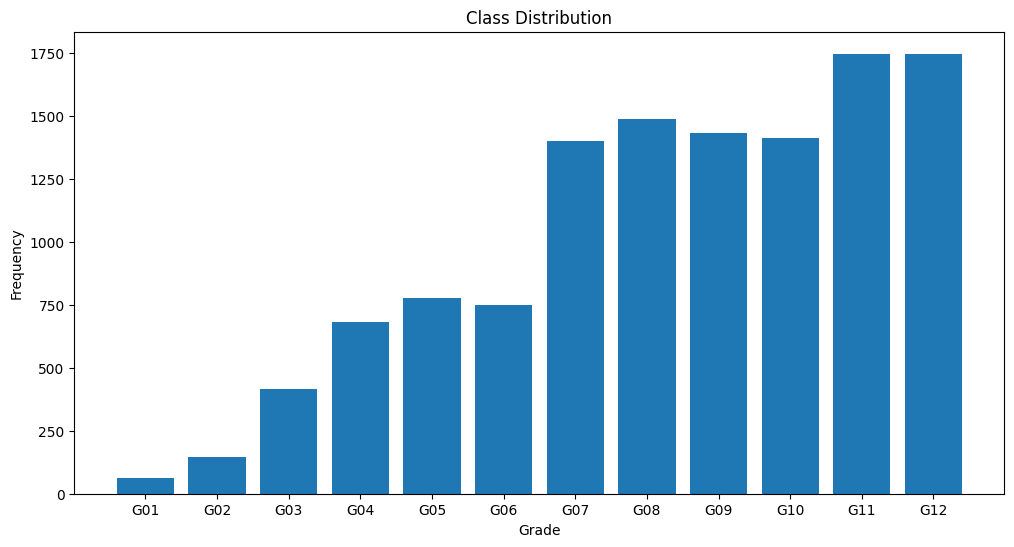

In [84]:
grade_counts = df.groupby('Grade').size()
grade_counts
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

## Feature Engineering

### length features

In [85]:
def sentence_length(s):
  s = s.split()
  return len(s)

In [86]:
df['sentence_length'] = df['sentence'].apply(lambda x: sentence_length(x))
df

,filename,sentence,Grade,sentence_length
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5
...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7


In [87]:
average_sent_length = df.groupby('Grade')['sentence_length'].mean()
print(average_sent_length)

Grade
G01    11.016129
G02     8.565517
G03     9.214976
G04     9.827941
G05    10.125161
G06    10.297333
G07    10.631880
G08    10.393674
G09    10.415793
G10    10.629866
G11    11.691294
G12    10.499427
Name: sentence_length, dtype: float64


In [88]:
def average_word_length(s):
  words = s.split()
  total_length = 0
  for word in words:
    total_length += len(word)
  if len(words) != 0:
    return total_length/len(words)
  else:
    return 0

In [89]:
df['average_word_length'] = df['sentence'].apply(lambda x: average_word_length(x))
df

,filename,sentence,Grade,sentence_length,average_word_length
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37,4.810811
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24,5.083333
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18,5.444444
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7,4.857143
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5,4.000000
...,...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12,3.500000
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10,5.400000
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6,3.833333
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7,3.714286


In [90]:
average_word_length = df.groupby('Grade')['average_word_length'].mean()
print(average_word_length)

Grade
G01    3.876825
G02    3.622736
G03    3.776267
G04    3.865070
G05    3.862941
G06    3.930864
G07    3.970709
G08    3.967448
G09    3.992176
G10    3.956843
G11    4.006395
G12    4.038201
Name: average_word_length, dtype: float64


In [91]:
def countLongWords(s):
  sent = s.split()
  count = 0
  for word in sent:
    if len(word) > 7:
      count += 1
  return count

In [92]:
df['countLongWords'] = df['sentence'].apply(lambda x: countLongWords(x))
df

,filename,sentence,Grade,sentence_length,average_word_length,countLongWords
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37,4.810811,2
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24,5.083333,3
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18,5.444444,1
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7,4.857143,1
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5,4.000000,0
...,...,...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12,3.500000,0
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10,5.400000,0
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6,3.833333,1
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7,3.714286,0


In [93]:
def countSegments(sentence):
  return sentence.count("،") + 1

In [94]:
df['countSegments'] = df['sentence'].apply(lambda x: countSegments(x))
df

,filename,sentence,Grade,sentence_length,average_word_length,countLongWords,countSegments
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37,4.810811,2,1
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24,5.083333,3,1
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18,5.444444,1,1
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7,4.857143,1,1
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5,4.000000,0,1
...,...,...,...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12,3.500000,0,1
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10,5.400000,0,1
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6,3.833333,1,1
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7,3.714286,0,1


### Readability Scores

In [95]:
def calculateFKGL(sentence):
  totalWords = len(sentence.split())
  totalSentences = countSegments(sentence)
  totalLetters = 0
  for word in sentence.split():
    totalLetters += len(word)
  FKGL = 0.39 * (totalWords / totalSentences) + 11.8 * (totalLetters / totalWords) - 15.59
  return FKGL

In [96]:
def countLongWords(sentence):
  count = 0
  sentence = sentence.split()
  for word in sentence:
    if len(word) > 8:
      count += 1
  return count

def calculateGFI(sentence):
  totalWords = len(sentence.split())
  totalSentences = countSegments(sentence)
  complexWords = countLongWords(sentence)
  GFI = 0.4 * ((totalWords / totalSentences) + 100 * (complexWords / totalWords))
  return GFI

In [97]:
def calculateARI(sentence):
  characters = 0
  for word in sentence.split():
    characters += len(word)
  words = len(sentence.split())
  sentences = countSegments(sentence)
  ARI = 4.71 * (characters / words) + 0.5 * (words / sentences) - 21.43
  return ARI

In [98]:
def calculateTTR(sentence):
  words = sentence.split()
  uniqueWords = []
  for word in words:
    if word not in uniqueWords:
      uniqueWords.append(word)
  return len(uniqueWords)/len(words)

In [99]:
df['FKGL'] = df['sentence'].apply(lambda x: calculateFKGL(x))
df['GFI'] = df['sentence'].apply(lambda x: calculateGFI(x))
df['ARI'] = df['sentence'].apply(lambda x: calculateARI(x))
df['TTR'] = df['sentence'].apply(lambda x: calculateTTR(x))

df

,filename,sentence,Grade,sentence_length,average_word_length,countLongWords,countSegments,FKGL,GFI,ARI,TTR
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37,4.810811,2,1,55.607568,15.881081,19.728919,0.918919
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24,5.083333,3,1,53.753333,11.266667,14.512500,1.000000
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18,5.444444,1,1,55.674444,9.422222,13.213333,1.000000
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7,4.857143,1,1,44.454286,2.800000,4.947143,1.000000
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5,4.000000,0,1,33.560000,2.000000,-0.090000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12,3.500000,0,1,30.390000,4.800000,1.055000,1.000000
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10,5.400000,0,1,52.030000,4.000000,9.004000,1.000000
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6,3.833333,1,1,31.983333,2.400000,-0.375000,1.000000
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7,3.714286,0,1,30.968571,2.800000,-0.435714,1.000000


### Word Frequency/Complexity

In [100]:
wordFrequency = {}
for sentence in df['sentence']:
  words = sentence.split()
  for word in words:
    if word not in wordFrequency:
      wordFrequency[word] = 1
    else:
      wordFrequency[word] += 1


sorted_wordFrequency = sorted(wordFrequency, key=wordFrequency.get)

In [101]:
import math

complexity_scores = {}
max_rank = len(sorted_wordFrequency)
for rank, word in enumerate(sorted_wordFrequency):
    scaled_score = 1 + 99 * (math.log(1 + rank) / math.log(max_rank + 1))  # Logarithmic scaling between 1 and 100
    complexity_scores[word] = scaled_score

In [102]:
def calculateComplexity(sentence, compDict):
  words = sentence.split()
  score = sum(complexity_scores.get(word, 1) for word in words)  # Default to 1 if word not found
  if len(words) > 0:
    normScore = score/len(words)
  else:
    normScore = 0
  return normScore

In [103]:
df['complexity'] = df['sentence'].apply(lambda x: calculateComplexity(x, complexity_scores))
df

,filename,sentence,Grade,sentence_length,average_word_length,countLongWords,countSegments,FKGL,GFI,ARI,TTR,complexity
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37,4.810811,2,1,55.607568,15.881081,19.728919,0.918919,96.219684
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24,5.083333,3,1,53.753333,11.266667,14.512500,1.000000,87.930678
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18,5.444444,1,1,55.674444,9.422222,13.213333,1.000000,76.150181
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7,4.857143,1,1,44.454286,2.800000,4.947143,1.000000,66.858696
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5,4.000000,0,1,33.560000,2.000000,-0.090000,1.000000,99.880249
...,...,...,...,...,...,...,...,...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12,3.500000,0,1,30.390000,4.800000,1.055000,1.000000,99.447816
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10,5.400000,0,1,52.030000,4.000000,9.004000,1.000000,98.200559
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6,3.833333,1,1,31.983333,2.400000,-0.375000,1.000000,98.852276
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7,3.714286,0,1,30.968571,2.800000,-0.435714,1.000000,97.562661


#Feature scalling

In [104]:
import numpy as np

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sentence_length = df['sentence_length'].values.reshape(-1, 1)  # Reshape to a 2D array
average_word_length = df['average_word_length'].values.reshape(-1, 1)  # Reshape to a 2D array
countLongWords = df['countLongWords'].values.reshape(-1, 1)  # Reshape to a 2D array
countSegments = df['countSegments'].values.reshape(-1, 1)  # Reshape to a 2D array
FKGL = df['FKGL'].values.reshape(-1, 1)  # Reshape to a 2D array
GFI = df['GFI'].values.reshape(-1, 1)  # Reshape to a 2D array
ARI = df['ARI'].values.reshape(-1, 1)  # Reshape to a 2D array
TTR = df['TTR'].values.reshape(-1, 1)  # Reshape to a 2D array
complexity = df['complexity'].values.reshape(-1, 1)  # Reshape to a 2D array

In [107]:
scaler = StandardScaler()
z_transformed_sentence_length = scaler.fit_transform(sentence_length)
z_transformed_average_word_length = scaler.fit_transform(average_word_length)
z_transformed_countLongWords = scaler.fit_transform(countLongWords)
z_transformed_countSegments = scaler.fit_transform(countSegments)
z_transformed_FKGL = scaler.fit_transform(FKGL)
z_transformed_GFI = scaler.fit_transform(GFI)
z_transformed_ARI = scaler.fit_transform(ARI)
z_transformed_TTR = scaler.fit_transform(TTR)
z_transformed_complexity = scaler.fit_transform(complexity)

In [108]:
df['sentence_length_transformed'] = z_transformed_sentence_length
df['average_word_length_transformed'] = z_transformed_average_word_length
df['countLongWords_transformed'] = z_transformed_countLongWords
df['countSegments_transformed'] = z_transformed_countSegments
df['FKGL_transformed'] = z_transformed_FKGL
df['GFI_transformed'] = z_transformed_GFI
df['ARI_transformed'] = z_transformed_ARI
df['TTR_transformed'] = z_transformed_TTR
df['complexity_transformed'] = z_transformed_complexity

In [109]:
df

,filename,sentence,Grade,sentence_length,average_word_length,countLongWords,countSegments,FKGL,GFI,ARI,...,complexity,sentence_length_transformed,average_word_length_transformed,countLongWords_transformed,countSegments_transformed,FKGL_transformed,GFI_transformed,ARI_transformed,TTR_transformed,complexity_transformed
0,G01_Sentences.txt,وهو كتاب بني على الطريقة الجامعة بين الطريقتين...,G01,37,4.810811,2,1,55.607568,15.881081,19.728919,...,96.219684,3.968148,1.131192,1.401780,0.0,2.117100,3.282640,3.304820,-1.180633,-0.537886
1,G01_Sentences.txt,ولا سيما نتاجات التعلم الهادفة إلى تعليم اللغة...,G01,24,5.083333,3,1,53.753333,11.266667,14.512500,...,87.930678,2.018526,1.493291,2.390552,0.0,1.924340,1.900700,2.304836,0.382846,-3.546072
2,G01_Sentences.txt,يبدأ الكتاب بوحدة تمهيدية منوعة تراعي حاجات ال...,G01,18,5.444444,1,1,55.674444,9.422222,13.213333,...,76.150181,1.118701,1.973097,0.413008,0.0,2.124053,1.348320,2.055787,0.382846,-7.821366
3,G01_Sentences.txt,وتحتوي على أنشطة وتدريبات ملائمة لحواس .,G01,7,4.857143,1,1,44.454286,2.800000,4.947143,...,66.858696,-0.530979,1.192753,0.413008,0.0,0.957641,-0.634924,0.471166,0.382846,-11.193365
4,G01_Sentences.txt,وفي طريقة تعلم الكتابة :,G01,5,4.000000,0,1,33.560000,2.000000,-0.090000,...,99.880249,-0.830921,0.053873,-0.575765,0.0,-0.174894,-0.874510,-0.494450,0.382846,0.790580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12042,G12_Sentences.txt,مدللا علمها من ألفاظ وعبارات الفقرة ( 2 ) في ا...,G12,12,3.500000,0,1,30.390000,4.800000,1.055000,...,99.447816,0.218875,-0.610474,-0.575765,0.0,-0.504437,-0.035958,-0.274955,0.382846,0.633645
12043,G12_Sentences.txt,وتتميز السيرة الغيرية بأنها تتناول شخصا حقيقيا...,G12,10,5.400000,0,1,52.030000,4.000000,9.004000,...,98.200559,-0.081067,1.914044,-0.575765,0.0,1.745188,-0.275544,1.248862,0.382846,0.180999
12044,G12_Sentences.txt,ثم شكر الحاضرين على حضورهم .,G12,6,3.833333,1,1,31.983333,2.400000,-0.375000,...,98.852276,-0.680950,-0.167576,0.413008,0.0,-0.338800,-0.754717,-0.549085,0.382846,0.417516
12045,G12_Sentences.txt,يا رافعا راية الحق أبشر بالخير .,G12,7,3.714286,0,1,30.968571,2.800000,-0.435714,...,97.562661,-0.530979,-0.325754,-0.575765,0.0,-0.444291,-0.634924,-0.560724,0.382846,-0.050502


## Model

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [137]:
X = df[['sentence_length_transformed', 'average_word_length_transformed', 'countSegments', 'FKGL_transformed', 'GFI_transformed', 'ARI_transformed', 'TTR_transformed', 'complexity_transformed']]
#X = df[['sentence_length', 'average_word_length', 'countSegments', 'FKGL', 'GFI', 'ARI', 'TTR', 'complexity']]
y = df['Grade']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
y_train.shape

(9637,)

### Logistic regression

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [115]:
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
predictions = classifier.predict(X_test)

In [116]:
predictions

array(['G10', 'G11', 'G10', ..., 'G12', 'G11', 'G08'], dtype=object)

In [117]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.23070539419087138


### SVM

In [134]:
from sklearn.svm import SVC


In [139]:
space_vector = SVC().fit(X_train, y_train)
svm_predictions = space_vector.predict(X_test)

In [140]:
svm_predictions

array(['G08', 'G10', 'G12', ..., 'G12', 'G10', 'G12'], dtype=object)

In [141]:
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.24356846473029045


### Decision tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [119]:
predictions = classifier.predict(X_test)

In [120]:
predictions

array(['G10', 'G10', 'G08', ..., 'G07', 'G04', 'G07'], dtype=object)

In [121]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.1954356846473029


### Random forrest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [124]:
y_pred

array(['G10', 'G10', 'G07', ..., 'G05', 'G04', 'G07'], dtype=object)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2037344398340249


### Neural network

In [126]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [127]:
y = pd.get_dummies(y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
MLP_model = Sequential()

# Input layer has 8 units. The first hidden layer 12 units
MLP_model.add(Dense(16, input_dim=8, use_bias=True, activation='relu'))

# second hidden layer has 8 units
MLP_model.add(Dense(16, use_bias=True, activation='relu'))

MLP_model.add(Dense(16, use_bias=True, activation='relu'))

MLP_model.add(Dense(16, use_bias=True, activation='relu'))

MLP_model.add(Dense(16, use_bias=True, activation='relu'))

MLP_model.add(Dense(16, use_bias=True, activation='relu'))

MLP_model.add(Dense(16, use_bias=True, activation='relu'))

# last/output layer, 1 units
MLP_model.add(Dense(12, use_bias=True, activation='softmax'))

In [130]:
MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 16)               

In [131]:
MLP_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
learning_evolution = MLP_model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.1)

Epoch 1/70
272/272 [==============================] - 2s 4ms/step - loss: 2.2973 - accuracy: 0.1742 - val_loss: 2.1584 - val_accuracy: 0.1857
Epoch 2/70
272/272 [==============================] - 1s 2ms/step - loss: 2.1686 - accuracy: 0.2256 - val_loss: 2.1221 - val_accuracy: 0.2396
Epoch 3/70
272/272 [==============================] - 1s 2ms/step - loss: 2.1404 - accuracy: 0.2275 - val_loss: 2.1113 - val_accuracy: 0.2396
Epoch 4/70
272/272 [==============================] - 1s 2ms/step - loss: 2.1312 - accuracy: 0.2270 - val_loss: 2.1163 - val_accuracy: 0.2417
Epoch 5/70
272/272 [==============================] - 1s 2ms/step - loss: 2.1204 - accuracy: 0.2303 - val_loss: 2.1046 - val_accuracy: 0.2500
Epoch 6/70
272/272 [==============================] - 0s 2ms/step - loss: 2.1155 - accuracy: 0.2298 - val_loss: 2.1187 - val_accuracy: 0.1961
Epoch 7/70
272/272 [==============================] - 0s 2ms/step - loss: 2.1103 - accuracy: 0.2286 - val_loss: 2.0998 - val_accuracy: 0.2261
Epoch 

In [133]:
loss, accuracy = MLP_model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}% - Loss {:.2f}'.format(accuracy*100, loss))

76/76 [==============================] - 0s 1ms/step - loss: 2.0656 - accuracy: 0.2407
Accuracy: 24.07% - Loss 2.07


In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = MLP_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_test.values, axis=1)




5/5 [==============================] - 0s 2ms/step


In [66]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)
print(conf_matrix)

[[1 3 3 0 0 0 0 0 2 0 2 1]
 [2 8 3 0 1 1 0 0 0 0 3 0]
 [0 2 2 0 2 1 1 0 0 0 1 0]
 [2 2 3 2 1 2 0 0 0 1 0 1]
 [0 0 3 1 0 3 2 1 0 0 1 0]
 [0 1 3 3 2 2 0 1 0 0 2 1]
 [1 1 1 0 0 1 4 1 0 4 3 3]
 [0 0 0 1 0 0 3 1 0 3 1 1]
 [0 0 0 0 0 0 0 3 1 4 2 1]
 [0 0 0 0 0 0 0 0 1 5 2 4]
 [0 0 0 0 0 0 0 0 0 3 2 3]
 [0 0 0 0 0 0 1 0 0 1 3 5]]


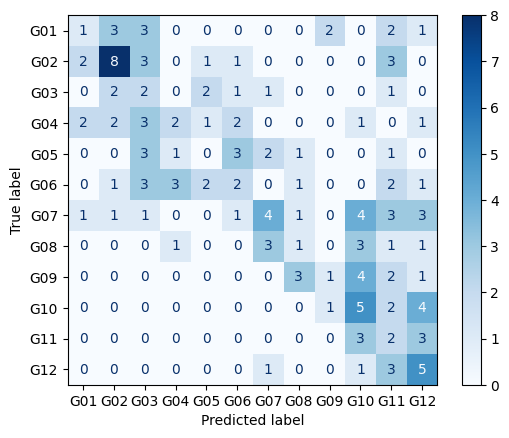

In [67]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming you've already computed the confusion matrix
# conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Create a display for the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                            display_labels=["G01", "G02", "G03", "G04", "G05", "G06", "G07", "G08", "G09", "G10", "G11", "G12"])

# Plot the display
cm_display.plot(cmap=plt.cm.Blues)  # You can change the colormap if needed
plt.show()
